In [1]:
!pip uninstall networkx -y
!pip install networkx==2.6.3
!pip install dcor
!pip install --upgrade "scipy>=1.10"
!pip install dcor
!pip install --upgrade scikit-learn scipy dcor

Found existing installation: networkx 2.6.3
Uninstalling networkx-2.6.3:
  Successfully uninstalled networkx-2.6.3
  Using cached networkx-2.6.3-py3-none-any.whl.metadata (5.0 kB)
Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)


In [2]:
!pip install dyconnmap

In [3]:
# notebook file: notebooks/feature_extraction.ipynb
from pathlib import Path
import sys

# 1. Detectar raíz del proyecto desde la notebook
# Estando en notebooks/, el padre ".." es la raíz del repo
PROJECT_ROOT = Path("..").resolve()
SRC_DIR = PROJECT_ROOT / "src"

print("PROJECT_ROOT:", PROJECT_ROOT)
print("SRC_DIR:", SRC_DIR)

# 2. Asegurarnos de que src/ está en sys.path
if str(SRC_DIR) not in sys.path:
    sys.path.insert(0, str(SRC_DIR))

# 3. Ahora podemos importar el módulo como paquete
from betavae_xai import feature_extraction

# Chequeo rápido de que cargó bien
print("N_ROIS_EXPECTED:", feature_extraction.N_ROIS_EXPECTED)
print("OUTPUT_CONNECTIVITY_DIR_NAME:", feature_extraction.OUTPUT_CONNECTIVITY_DIR_NAME)
print("CONNECTIVITY_CHANNEL_NAMES:", feature_extraction.CONNECTIVITY_CHANNEL_NAMES)


PROJECT_ROOT: /home/diego/proyectos/betavae-xai-ad
SRC_DIR: /home/diego/proyectos/betavae-xai-ad/src


2025-11-19 02:42:07,148 - INFO - feature_extraction.py:57 - Successfully imported 'threshold_omst_global_cost_efficiency' from 'dyconnmap.graphs.threshold' and aliased as 'orthogonal_minimum_spanning_tree'.
2025-11-19 02:42:07,149 - INFO - feature_extraction.py:187 - Global MAX_WORKERS for ProcessPoolExecutor set to: 6 (based on 12 total cores)
2025-11-19 02:42:07,149 - INFO - feature_extraction.py:353 - --- Initializing AAL3 ROI Processing Information ---
2025-11-19 02:42:07,153 - INFO - feature_extraction.py:392 - AAL3 ROI processing info initialized (prior to reordering attempt):
2025-11-19 02:42:07,154 - INFO - feature_extraction.py:393 -   Indices of 4 AAL3 systemically missing ROIs (0-based, from 170): [34, 35, 80, 81]
2025-11-19 02:42:07,154 - INFO - feature_extraction.py:394 -   Number of ROIs in AAL3 meta after excluding systemically missing: 166 (Expected: 166)
2025-11-19 02:42:07,154 - INFO - feature_extraction.py:395 -   Indices of small ROIs to drop (from the 166 set, 0-ba

N_ROIS_EXPECTED: 131
OUTPUT_CONNECTIVITY_DIR_NAME: AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned
CONNECTIVITY_CHANNEL_NAMES: ['Pearson_OMST_GCE_Signed_Weighted', 'Pearson_Full_FisherZ_Signed', 'MI_KNN_Symmetric', 'dFC_AbsDiffMean', 'dFC_StdDev', 'DistanceCorr', 'Granger_F_lag1']


In [4]:
# Esto lanza TODO el pipeline: carga metadata, QC, procesa todos los sujetos,
# guarda tensores individuales y el GLOBAL_TENSOR
feature_extraction.main()


2025-11-19 02:43:29,828 - INFO - feature_extraction.py:1729 - RUNTIME NetworkX version being used: 2.6.3
2025-11-19 02:43:29,829 - INFO - feature_extraction.py:1740 - Main process RAM at start: 521.34 MB
2025-11-19 02:43:29,830 - INFO - feature_extraction.py:1741 - --- Starting fMRI Connectivity Pipeline (Version: AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17) ---
2025-11-19 02:43:29,830 - INFO - feature_extraction.py:1747 - --- Final Expected ROIs for Connectivity Matrices: 131 ---
2025-11-19 02:43:29,830 - INFO - feature_extraction.py:1748 - --- Target Homogenized Time Series Length: 140 ---
2025-11-19 02:43:29,831 - INFO - feature_extraction.py:1749 - --- Output Directory Name: AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned ---
2025-11-19 02:43:29,831 - INFO - feature_extraction.py:1750 - --- Selected Connectivity Channels for VAE: ['Pearson_OMST_GCE_Signed_Weighted', 'Pearson_Full_FisherZ_Signe

📂 Carpeta analizada: AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned
📄 Cargando: GLOBAL_TENSOR_from_AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned.npz ...

✅ Tensor Cargado Exitosamente
   Dimensiones: (431, 7, 131, 131)
   Sujetos: 431
   Canales: 7


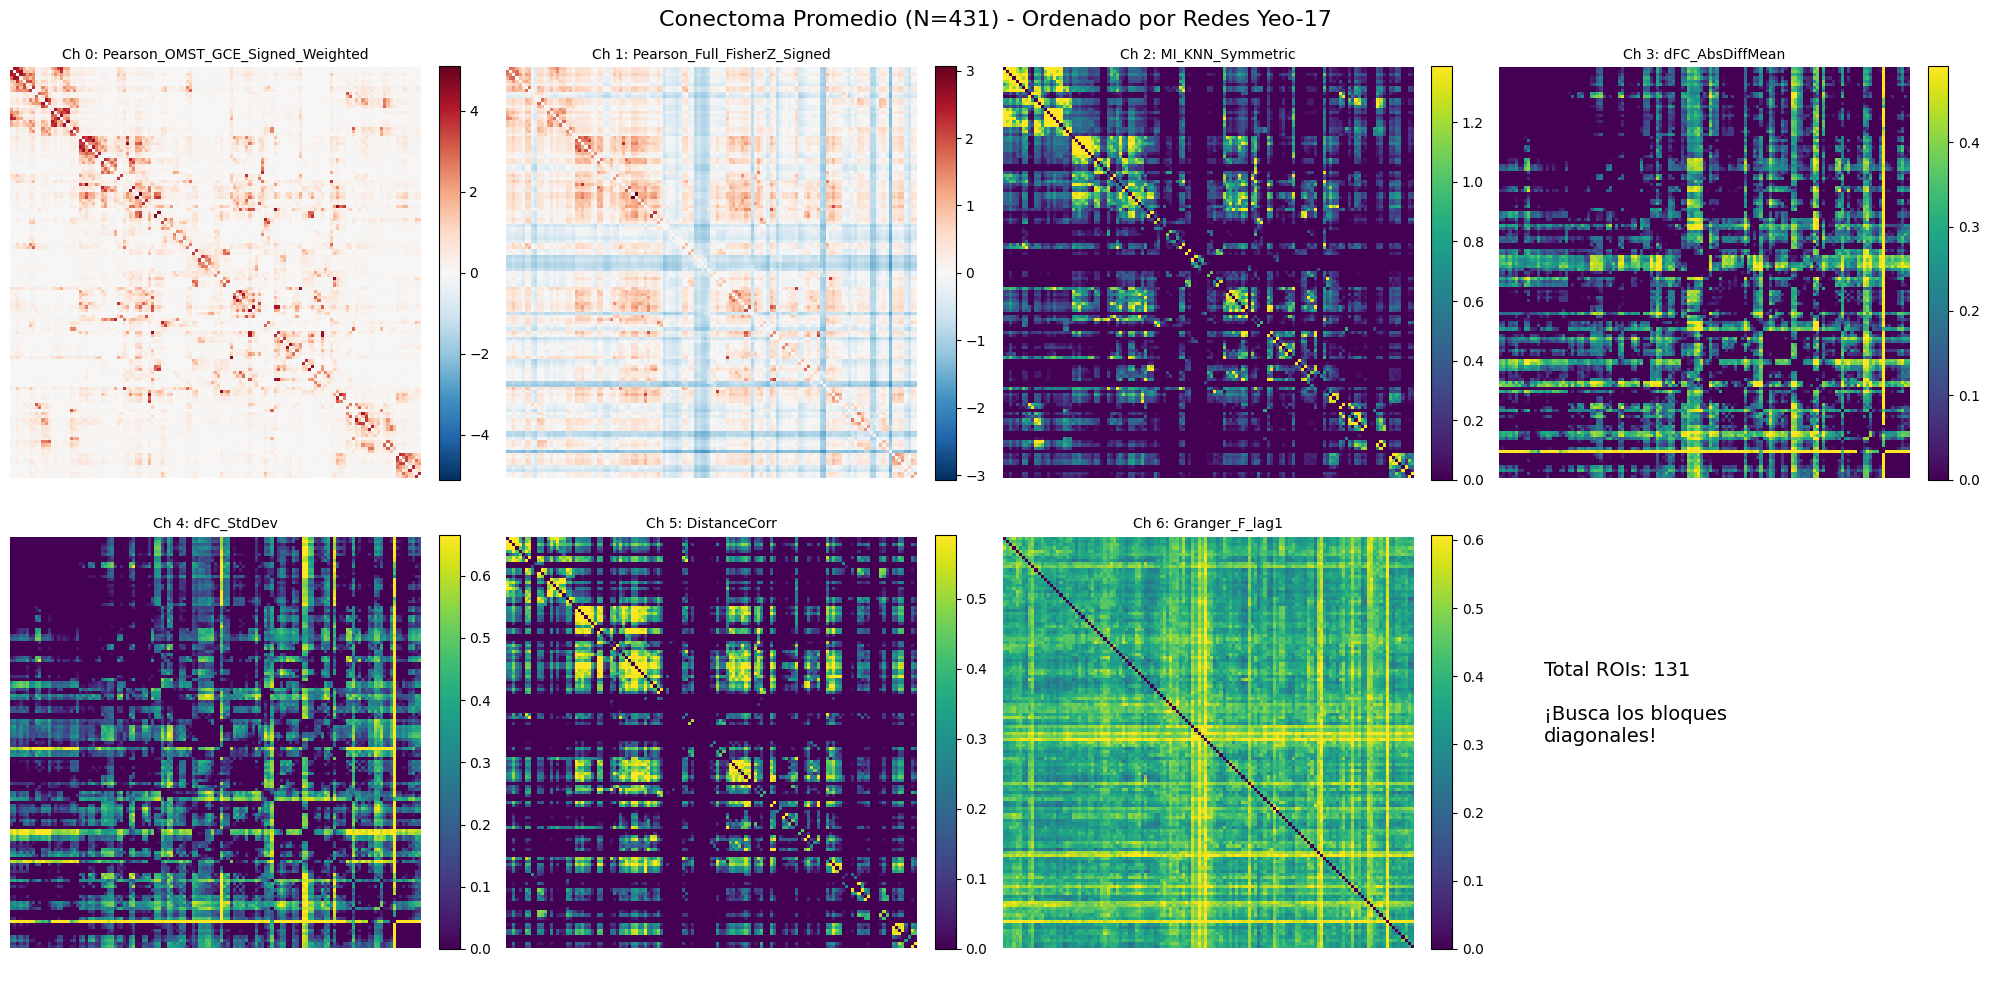

Interpretación Visual:
- Canales Pearson: Deberías ver cuadrados rojos/azules definidos a lo largo de la diagonal.
- Canal OMST: Debería verse como una red dispersa (pocos puntos fuertes).
- Si ves bloques diagonales, el reordenamiento Yeo-17 funcionó.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

# 1. Configurar ruta
PROJECT_ROOT = Path("..").resolve()
DATA_DIR = PROJECT_ROOT / "data"

# 2. Encontrar la carpeta de resultados más reciente
# El script creó una carpeta que empieza con "AAL3_dynamicROIs_..."
results_dirs = sorted(list(DATA_DIR.glob("AAL3_dynamicROIs_*")), key=os.path.getmtime, reverse=True)

if not results_dirs:
    print("❌ No se encontraron carpetas de resultados en data/.")
else:
    latest_dir = results_dirs[0]
    print(f"📂 Carpeta analizada: {latest_dir.name}")
    
    # 3. Cargar el Tensor Global
    global_files = list(latest_dir.glob("GLOBAL_TENSOR*.npz"))
    
    if global_files:
        tensor_path = global_files[0]
        print(f"📄 Cargando: {tensor_path.name} ...")
        
        data = np.load(tensor_path)
        # El tensor tiene forma (Sujetos, Canales, ROIs, ROIs)
        global_tensor = data['global_tensor_data'] 
        channel_names = data['channel_names']
        subject_ids = data['subject_ids']
        roi_names = data['roi_names_in_order']
        
        print(f"\n✅ Tensor Cargado Exitosamente")
        print(f"   Dimensiones: {global_tensor.shape}")
        print(f"   Sujetos: {len(subject_ids)}")
        print(f"   Canales: {len(channel_names)}")

        # 4. VISUALIZACIÓN: El "Cerebro Promedio"
        # Promediamos todos los sujetos para ver la estructura general de las redes
        mean_connectome = np.mean(global_tensor, axis=0)
        
        fig, axes = plt.subplots(2, 4, figsize=(20, 10))
        axes = axes.flatten()
        
        fig.suptitle(f"Conectoma Promedio (N={len(subject_ids)}) - Ordenado por Redes Yeo-17", fontsize=16)
        
        for i, ch_name in enumerate(channel_names):
            matrix = mean_connectome[i]
            
            # Ajuste de color: Divergente para Pearson, Secuencial para otros
            if "Pearson" in ch_name:
                cmap = 'RdBu_r'
                vmax = np.max(np.abs(matrix))
                vmin = -vmax
            else:
                cmap = 'viridis' # O 'magma' para Granger
                vmin = 0
                vmax = np.percentile(matrix, 98) # Saturar al 98% para ver contraste
            
            im = axes[i].imshow(matrix, cmap=cmap, vmin=vmin, vmax=vmax, origin='upper')
            axes[i].set_title(f"Ch {i}: {ch_name}", fontsize=10)
            plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
            axes[i].axis('off')
            
        # Ocultar el último subplot vacío (son 7 canales, 8 espacios)
        axes[7].axis('off')
        axes[7].text(0.1, 0.5, f"Total ROIs: {len(roi_names)}\n\n¡Busca los bloques\ndiagonales!", fontsize=14)
        
        plt.tight_layout()
        plt.show()
        
        print("Interpretación Visual:")
        print("- Canales Pearson: Deberías ver cuadrados rojos/azules definidos a lo largo de la diagonal.")
        print("- Canal OMST: Debería verse como una red dispersa (pocos puntos fuertes).")
        print("- Si ves bloques diagonales, el reordenamiento Yeo-17 funcionó.")
        
    else:
        print("❌ No se encontró el archivo .npz dentro de la carpeta.")

📂 Analizando Tensor: GLOBAL_TENSOR_from_AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned.npz
📄 Analizando Mapping: aal3_131_to_yeo17_mapping.csv

--- 1. Test de Consistencia (CSV vs NPZ) ---
✅ ¡ÉXITO! El orden de los ROIs en el CSV y en el Tensor es idéntico.

--- 2. Estructura de las Redes (Yeo-17) ---


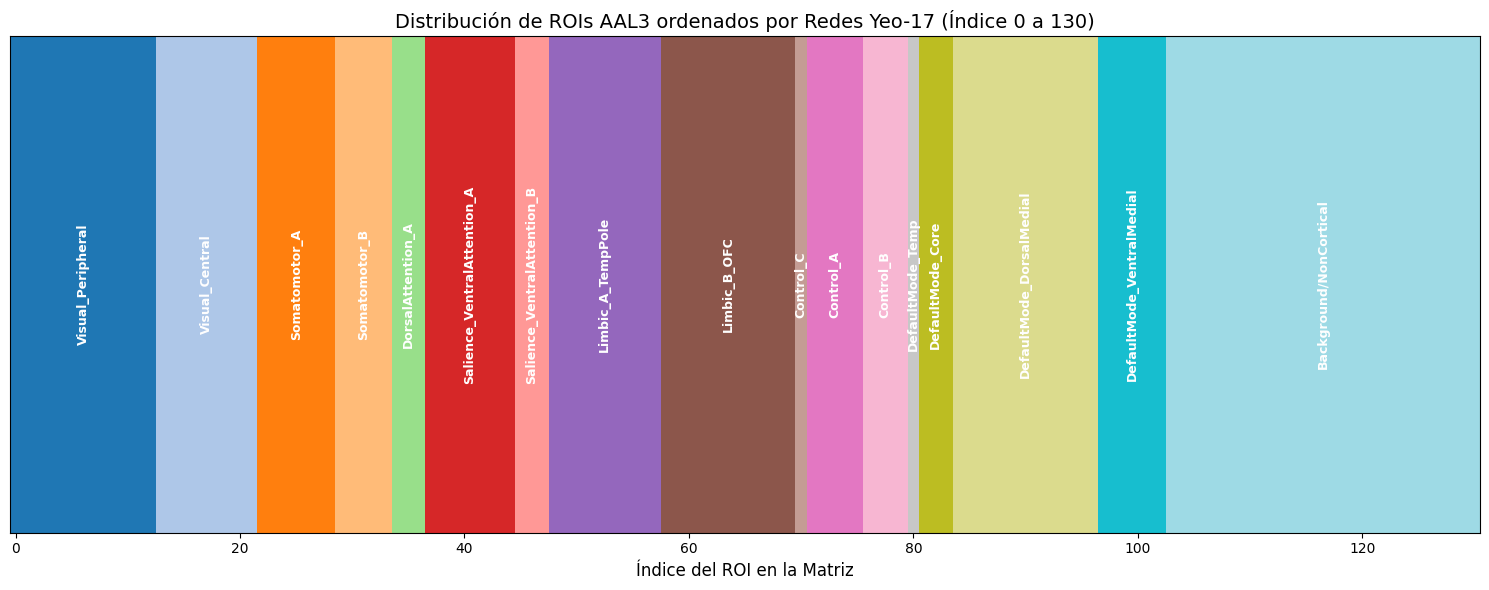


--- Cantidad de ROIs por Red ---
Yeo17_Network
Background/NonCortical         28
Visual_Peripheral              13
DefaultMode_DorsalMedial       13
Limbic_B_OFC                   12
Limbic_A_TempPole              10
Visual_Central                  9
Salience_VentralAttention_A     8
Somatomotor_A                   7
DefaultMode_VentralMedial       6
Somatomotor_B                   5
Control_A                       5
Control_B                       4
DorsalAttention_A               3
Salience_VentralAttention_B     3
DefaultMode_Core                3
DefaultMode_Temp                1
Control_C                       1
Name: count, dtype: int64


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# --- CONFIGURACIÓN ---
PROJECT_ROOT = Path("..").resolve()
DATA_DIR = PROJECT_ROOT / "data"

# 1. Buscar el Tensor Global más reciente
results_dirs = sorted(list(DATA_DIR.glob("AAL3_dynamicROIs_*")), key=os.path.getmtime, reverse=True)
if not results_dirs:
    raise FileNotFoundError("No encontré la carpeta de resultados en data/")

latest_output_dir = results_dirs[0]
global_tensor_path = list(latest_output_dir.glob("GLOBAL_TENSOR*.npz"))[0]
mapping_csv_path = DATA_DIR / "aal3_131_to_yeo17_mapping.csv"

print(f"📂 Analizando Tensor: {global_tensor_path.name}")
print(f"📄 Analizando Mapping: {mapping_csv_path.name}")

# --- CARGA DE DATOS ---
# A. Cargar CSV
df_mapping = pd.read_csv(mapping_csv_path)

# B. Cargar NPZ
data_npz = np.load(global_tensor_path)
roi_names_npz = data_npz['roi_names_in_order']
network_labels_npz = data_npz['network_labels_in_order']

# --- VALIDACIÓN RIGUROSA ---
print("\n--- 1. Test de Consistencia (CSV vs NPZ) ---")

# Verificar longitud
assert len(df_mapping) == len(roi_names_npz) == 131, "¡ERROR! Longitudes no coinciden (deberían ser 131)."

# Verificar orden exacto nombre por nombre
mismatches = []
for i in range(131):
    name_csv = df_mapping.iloc[i]['AAL3_Name']
    name_npz = roi_names_npz[i]
    if name_csv != name_npz:
        mismatches.append(f"Index {i}: CSV={name_csv} != NPZ={name_npz}")

if not mismatches:
    print("✅ ¡ÉXITO! El orden de los ROIs en el CSV y en el Tensor es idéntico.")
else:
    print(f"❌ ¡PELIGRO! Hay {len(mismatches)} discrepancias.")
    print(mismatches[:5])

# --- VISUALIZACIÓN PARA EL PAPER ---
print("\n--- 2. Estructura de las Redes (Yeo-17) ---")

# Crear una matriz de identidad visual de las redes
networks = df_mapping['Yeo17_Network'].values
unique_networks = df_mapping['Yeo17_Network'].unique()

# Crear un mapa de colores para las redes
network_to_int = {net: i for i, net in enumerate(unique_networks)}
network_colors = [network_to_int[n] for n in networks]

# Plotear la "Barra de Redes" que iría al lado de tus matrices en el paper
plt.figure(figsize=(15, 6))
plt.imshow([network_colors], aspect='auto', cmap='tab20')
plt.yticks([])
plt.title("Distribución de ROIs AAL3 ordenados por Redes Yeo-17 (Índice 0 a 130)", fontsize=14)
plt.xlabel("Índice del ROI en la Matriz", fontsize=12)

# Poner etiquetas en los centroides de cada red
for net in unique_networks:
    indices = np.where(networks == net)[0]
    if len(indices) > 0:
        center = np.mean(indices)
        plt.text(center, 0, net, rotation=90, ha='center', va='center', fontsize=9, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print("\n--- Cantidad de ROIs por Red ---")
print(df_mapping['Yeo17_Network'].value_counts())

In [7]:
from pathlib import Path
import numpy as np
import pandas as pd
from betavae_xai import feature_extraction

BASE = feature_extraction.BASE_PATH_AAL3
n_rois = feature_extraction.FINAL_N_ROIS_EXPECTED
print("FINAL_N_ROIS_EXPECTED:", n_rois)

mapping_csv = BASE / f"aal3_{n_rois}_to_yeo17_mapping.csv"
print("Mapping CSV:", mapping_csv)

df_map = pd.read_csv(mapping_csv)
print("df_map shape:", df_map.shape)

# 1) Debe tener 131 filas
assert df_map.shape[0] == n_rois

# 2) Chequear que la permutación new_order_indices sea de 0..130 sin repetidos
order_info = feature_extraction.AAL3_ROI_ORDER_MAPPING
new_order = order_info["new_order_indices"]

print("len(new_order):", len(new_order))
assert len(new_order) == n_rois
assert sorted(new_order) == list(range(n_rois))

print("OK: new_order_indices es una permutación válida de 0..130.")

# 3) Chequear consistencia entre nombres de AAL3
orig_names = order_info["roi_names_original_order"]
new_names = order_info["roi_names_new_order"]

assert len(orig_names) == n_rois
assert len(new_names) == n_rois

# Ver un par de ejemplos:
print("Primeros 5 ROIs en orden ORIGINAL:")
for i in range(5):
    print(i, "→", orig_names[i])

print("\nPrimeros 5 ROIs en orden NUEVO (Yeo-17):")
for i in range(5):
    print(i, "→", new_names[i])

print("\nTodo OK en AAL3_ROI_ORDER_MAPPING.")


FINAL_N_ROIS_EXPECTED: 131
Mapping CSV: /home/diego/proyectos/betavae-xai-ad/data/aal3_131_to_yeo17_mapping.csv
df_map shape: (131, 6)
len(new_order): 131
OK: new_order_indices es una permutación válida de 0..130.
Primeros 5 ROIs en orden ORIGINAL:
0 → FAL
1 → FAR
2 → F1_2L
3 → F1_2R
4 → F2_2L

Primeros 5 ROIs en orden NUEVO (Yeo-17):
0 → O1L
1 → O1R
2 → O2L
3 → O2R
4 → O3L

Todo OK en AAL3_ROI_ORDER_MAPPING.


In [8]:
from pathlib import Path
import numpy as np
from betavae_xai import feature_extraction

BASE = feature_extraction.BASE_PATH_AAL3
out_dir = BASE / feature_extraction.OUTPUT_CONNECTIVITY_DIR_NAME / "individual_subject_tensors"

print("Buscando tensores individuales en:", out_dir)
npz_files = sorted(out_dir.glob("tensor_*npz"))
print("Encontrados:", len(npz_files))
assert len(npz_files) > 0, "No hay tensores individuales encontrados."

example_npz = npz_files[0]
print("Ejemplo:", example_npz.name)

with np.load(example_npz) as data:
    tensor = data["tensor_data"]
    roi_names_npz = data["roi_names_in_order"]
    net_labels_npz = data["network_labels_in_order"]
    order_name_npz = str(data["roi_order_name"])

print("tensor shape:", tensor.shape)
print("len(roi_names_in_order):", len(roi_names_npz))
print("len(network_labels_in_order):", len(net_labels_npz))
print("roi_order_name:", order_name_npz)

n_rois = feature_extraction.FINAL_N_ROIS_EXPECTED
n_ch = feature_extraction.N_CHANNELS

assert tensor.shape[0] == n_ch
assert tensor.shape[1] == tensor.shape[2] == n_rois
assert len(roi_names_npz) == n_rois
assert len(net_labels_npz) == n_rois

# Comparar con el mapping del módulo:
order_info = feature_extraction.AAL3_ROI_ORDER_MAPPING
assert list(roi_names_npz) == order_info["roi_names_new_order"]

print("OK: el tensor individual tiene el orden correcto de ROIs y coincide con AAL3_ROI_ORDER_MAPPING.")


Buscando tensores individuales en: /home/diego/proyectos/betavae-xai-ad/data/AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned/individual_subject_tensors
Encontrados: 431
Ejemplo: tensor_7ch_131rois_002_S_0295.npz
tensor shape: (7, 131, 131)
len(roi_names_in_order): 131
len(network_labels_in_order): 131
roi_order_name: aal3_to_yeo17_overlap_sorted
OK: el tensor individual tiene el orden correcto de ROIs y coincide con AAL3_ROI_ORDER_MAPPING.


In [9]:
from pathlib import Path
import numpy as np
from betavae_xai import feature_extraction

BASE = feature_extraction.BASE_PATH_AAL3
dirname = feature_extraction.OUTPUT_CONNECTIVITY_DIR_NAME

global_npz_candidates = sorted((BASE / dirname).glob("GLOBAL_TENSOR_from_*.npz"))
print("GLOBAL_TENSOR candidates:", [p.name for p in global_npz_candidates])
assert global_npz_candidates, "No se encontró GLOBAL_TENSOR."

global_npz = global_npz_candidates[0]
print("Usando:", global_npz.name)

with np.load(global_npz) as data:
    G = data["global_tensor_data"]
    roi_names_global = data["roi_names_in_order"]
    net_labels_global = data["network_labels_in_order"]
    order_name_global = str(data["roi_order_name"])

print("global_tensor_data shape:", G.shape)  # (N_subjects, N_channels, 131, 131)
print("len(roi_names_in_order):", len(roi_names_global))
print("roi_order_name:", order_name_global)

n_rois = feature_extraction.FINAL_N_ROIS_EXPECTED
n_ch = feature_extraction.N_CHANNELS

assert G.shape[1] == n_ch
assert G.shape[2] == G.shape[3] == n_rois
assert len(roi_names_global) == n_rois

# Comparar con mapping del módulo:
order_info = feature_extraction.AAL3_ROI_ORDER_MAPPING
assert list(roi_names_global) == order_info["roi_names_new_order"]

print("OK: GLOBAL_TENSOR tiene el mismo orden de ROIs que el mapping del módulo.")


GLOBAL_TENSOR candidates: ['GLOBAL_TENSOR_from_AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned.npz']
Usando: GLOBAL_TENSOR_from_AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned.npz
global_tensor_data shape: (431, 7, 131, 131)
len(roi_names_in_order): 131
roi_order_name: aal3_to_yeo17_overlap_sorted
OK: GLOBAL_TENSOR tiene el mismo orden de ROIs que el mapping del módulo.
